# Houseprices for Italian Listings on Immobiliare.it 

## Luca Verginer

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import re
import json
import datetime
import dateutil

In [2]:
%matplotlib inline

In [3]:
# for extracting the area
re_area = re.compile("\s*(\d+)\s+")

In [4]:
plt.matplotlib.style.available

['ggplot',
 'seaborn-dark-palette',
 'grayscale',
 'seaborn-colorblind',
 'fivethirtyeight',
 'seaborn-pastel',
 'seaborn-darkgrid',
 'seaborn-bright',
 'seaborn-ticks',
 'dark_background',
 'seaborn-white',
 'seaborn-notebook',
 'seaborn-dark',
 'seaborn-muted',
 'seaborn-talk',
 'seaborn-deep',
 'bmh',
 'seaborn-paper',
 'seaborn-poster',
 'seaborn-whitegrid',
 'classic']

In [5]:
plt.matplotlib.style.use('ggplot')

In [6]:
def correctScrapyJSONOutput(inputLine, querylocation):
    outputLine = {}
    outputLine['querylocation'] = querylocation
    
    if len(inputLine['area'])==0:
        outputLine['area'] = 'NaN'
    else:
        area = re_area.match(inputLine['area'][0]).groups()[0]
        outputLine['area'] = area
    
    if len(inputLine['bathrooms']) == 0:
        outputLine['bathrooms'] = "NaN"
    else:
        outputLine['bathrooms'] = inputLine['bathrooms'][0].strip()
    
    try:
        outputLine['bathrooms'] =  int(outputLine['bathrooms'])
    except:
        outputLine['bathrooms'] = 4
    
    outputLine['contract'] = inputLine['contract'][0]
    outputLine['description'] = inputLine['description']
    
    if len(inputLine['energyClass']) == 0:
        outputLine['energyClass'] = "NaN"
    else:
        outputLine['energyClass'] = inputLine['energyClass'][0]
    
    if len(inputLine['gardenQ']) == 0:
        outputLine['gardenQ'] = "NaN"
    else:
        outputLine['gardenQ'] = inputLine['gardenQ'][0]
    outputLine['address'] = inputLine['address']
    outputLine['listingDate'] = dateutil.parser.parse(inputLine['listingDate'][0])
    outputLine['price'] = float(inputLine["price"][0].replace(".",""))
    outputLine['url'] = inputLine['url']
    return outputLine

In [7]:
def importScrapyCSV(filePath, query, maxLines=100000):
    num_lines = sum(1 for line in open(filePath))
    outputList = []
    with open(filePath, 'r') as scrapyJsonFile:
        for i, line in enumerate(scrapyJsonFile):
            if i > maxLines:
                break
            if i==0:
                line = json.loads(line[1:-2])
            elif i==num_lines-1:
                line = json.loads(line[:-1])
            else:
                # for badly put together json
                if "][" in line:
                    badLines = line.split('][')
                    badLine1 = json.loads(badLines[0])
                    badLine2 = json.loads(badLines[1][:-2])
                    outputList.append(correctScrapyJSONOutput(badLine1,query))
                    outputList.append(correctScrapyJSONOutput(badLine2,query))
                    continue
                line = json.loads(line[:-2])
            outputList.append(correctScrapyJSONOutput(line,query))
    return outputList

In [8]:
milanoDict = importScrapyCSV('./scrapes/milano.json','Milano')
luccaDict = importScrapyCSV('./scrapes/lucca.json','Lucca')
bolzanoDict = importScrapyCSV('./scrapes/bolzano.json','Bolzano')
trentoDict = importScrapyCSV('./scrapes/trento.json','Trento')
firenzeDict = importScrapyCSV('./scrapes/firenze.json','Firenze')
romaDict = importScrapyCSV('./scrapes/roma.json','Roma',10733)

In [9]:
dtaFrame = pd.DataFrame(milanoDict)
dtaFrame = dtaFrame.append(luccaDict)
dtaFrame = dtaFrame.append(bolzanoDict)
dtaFrame = dtaFrame.append(trentoDict)
dtaFrame = dtaFrame.append(firenzeDict)
dtaFrame = dtaFrame.append(romaDict)

In [10]:
dtaFrame

,address,area,bathrooms,contract,description,energyClass,gardenQ,listingDate,price,querylocation,url
0,"[Via Alessandro Astesani, Milano, Zona: Affori...",164,3,Vendita,Milano-Affori FNM,A,Comune,2016-09-02,418200,Milano,http://www.immobiliare.it/48931559-Vendita-Att...
1,"[Via Giuseppe Pecchio 20, Milano, Zona: Città ...",140,2,Vendita,"""Via Pecchio - P.zza Aspromonte: Vendesi affas...",G,Nessuno,2016-02-16,499000,Milano,http://www.immobiliare.it/51506571-Vendita-Qua...
2,"[Via Giulio Cesare Procaccini 1, Milano, Zona:...",66,1,Vendita,LANCIO COMMERCIALE 2° LOTTO 27-28 FEBBRAIO,A,Comune,2016-01-26,349000,Milano,http://www.immobiliare.it/51686587-Vendita-Bil...
3,"[Via Marco Fabio Quintiliano 5, Milano, Zona: ...",55,1,Vendita,"Proponiamo in vendita, in contesto di nuova co...",A,Privato,2016-10-02,153000,Milano,http://www.immobiliare.it/52445165-Vendita-Bil...
4,"[via Copernico, Milano, Zona: Centrale, Repubb...",135,2,Vendita,Rif: Copernico 135 - In Palazzo Signorile con ...,F,NaN,2016-03-02,380000,Milano,http://www.immobiliare.it/53306267-Vendita-Qua...
5,"[Via Marco Fabio Quintiliano 5, Milano, Zona: ...",114,2,Vendita,"Proponiamo in vendita, in contesto di nuova co...",A,Privato,2015-10-27,326000,Milano,http://www.immobiliare.it/53333455-Vendita-Tri...
6,"[viale Gran Sasso, Milano, Zona: Città Studi, ...",270,3,Vendita,"Rif: DSZ17 - Milano, Viale Gran Sasso, nelle i...",F,Nessuno,2016-01-26,1050,Milano,http://www.immobiliare.it/54539458-Vendita-App...
7,"[Viale Omero, Milano, Zona: Missaglia, Gratoso...",55,1,Vendita,immobiliare.gng@fastwebnet.it - viale omero. c...,F,Comune,2016-10-02,107000,Milano,http://www.immobiliare.it/54718094-Vendita-Bil...
8,"[Viale Lunigiana 4, Milano, Zona: Monza-Maggio...",77,1,Vendita,M3 SONDRIO - In stabile civile anni '50 ben ab...,F,Nessuno,2016-12-01,187000,Milano,http://www.immobiliare.it/47500133-Vendita-Tri...
9,"[Via Alessandro Astesani 56, Milano, Zona: Aff...",86,1,Vendita,Milano-Affori,A,Comune,2016-09-02,206400,Milano,http://www.immobiliare.it/50154023-Vendita-Bil...


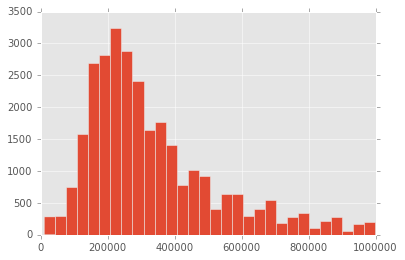

In [16]:
plt.hist(dtaFrame[dtaFrame.price > 10000].price, bins=30);

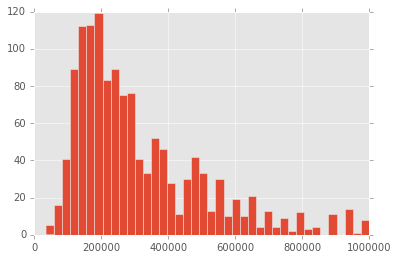

In [12]:
plt.hist(dtaFrame[(dtaFrame.price > 10000) & (dtaFrame.querylocation == 'Lucca')].price, bins=40);

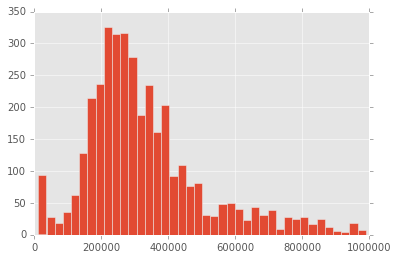

In [11]:

plt.hist(dtaFrame[(dtaFrame.price > 10000) & (dtaFrame.querylocation == 'Bolzano')].price, bins=40);

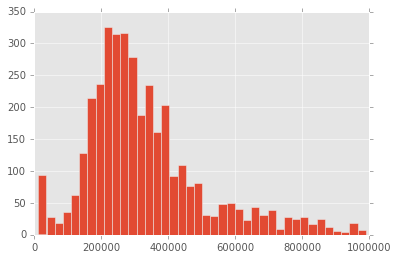

In [11]:
plt.hist(dtaFrame[(dtaFrame.price > 10000) & (dtaFrame.querylocation == 'Bolzano')].price, bins=40);

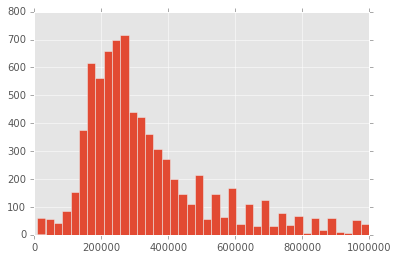

In [35]:
plt.hist(dtaFrame[(dtaFrame.price > 8000) & (dtaFrame.querylocation == 'Firenze')].price, bins=40);

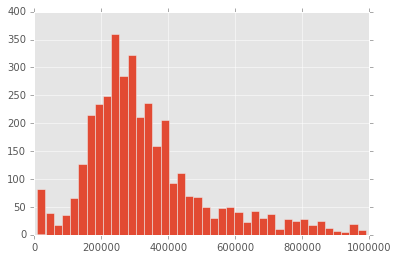

In [30]:
plt.hist(dtaFrame[(dtaFrame.price > 8000) & (dtaFrame.querylocation == 'Bolzano')].price, bins=40);

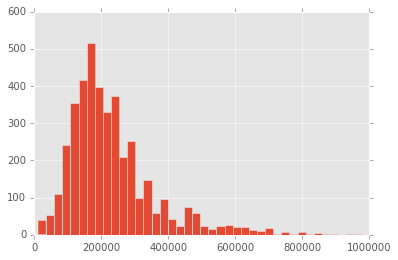

In [32]:
location = "Trento"
plt.hist(dtaFrame[(dtaFrame.price > 8000) & (dtaFrame.querylocation == location)].price, bins=40);

In [42]:
dtaFrame.pivot_table(values='price', index=['querylocation'], columns='energyClass', aggfunc='count')

energyClass,A,A+,A1,A2,A3,B,C,D,E,F,G,NaN
querylocation,,,,,,,,,,,,
Bolzano,486,28,1,NaN,NaN,419,197,109,99,95,1515,854
Firenze,129,12,5,1,NaN,58,89,101,257,699,5506,1368
Lucca,38,8,NaN,NaN,NaN,69,93,75,95,201,768,72
Milano,290,31,2,NaN,NaN,135,93,137,284,492,1215,136
Roma,401,92,2,NaN,2,331,253,183,256,668,7669,877
Trento,250,68,2,NaN,NaN,303,446,467,235,138,461,1768


In [36]:
dtaFrame.pivot_table?